In [3]:
import json
import pathlib
import cv2
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#file path to label
Json_file = "/content/drive/MyDrive/labels.json"
with open(Json_file, 'r', encoding='utf8') as f:
    labels = json.load(f)
labels

{'1.jpg': 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '2.jpg': 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '3.jpg': '58 Thái Thịnh, Đống Đa, Hà Nội',
 '4.jpeg': 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '5.jpg': 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '6.jpg': 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 '7.jpg': '40 Cát Linh, Đống Đa, Hà Nội',
 '8.jpg': 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 '9.JPG': 'Nhà 87 ngõ 416 Đê La Thành',
 '10.JPG': 'Up coworking Space, 89 Láng Hạ, Hà Nội',
 '11.jpg': '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 '12.jpg': 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 '13.jpg': '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 '14.jpg': '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '15.jpg': '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 '0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '

In [6]:
#find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list= set()
for label in labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)
len(char_list)

167

In [7]:
"".join(char_list)

' !"#%&\'()+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvwxyzÀÁÂÊÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủỨứừửữựỳỵỷỹ'

In [18]:
international_letters = set("ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvwxyz")
vietnamese = set("ÀÁÂÊÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủỨứừửữựỳỵỷỹ")
numbers = set("0123456789")
special_characters = set("!#%&\'()+,-./:;?")

letter_count = sum(label.count(char) for label in labels.values() for char in label if char in international_letters)
vietnamese_count = sum(label.count(char) for label in labels.values() for char in label if char in vietnamese)
number_count = sum(label.count(char) for label in labels.values() for char in label if char in numbers)
special_count = sum(label.count(char) for label in labels.values() for char in label if char in special_characters)

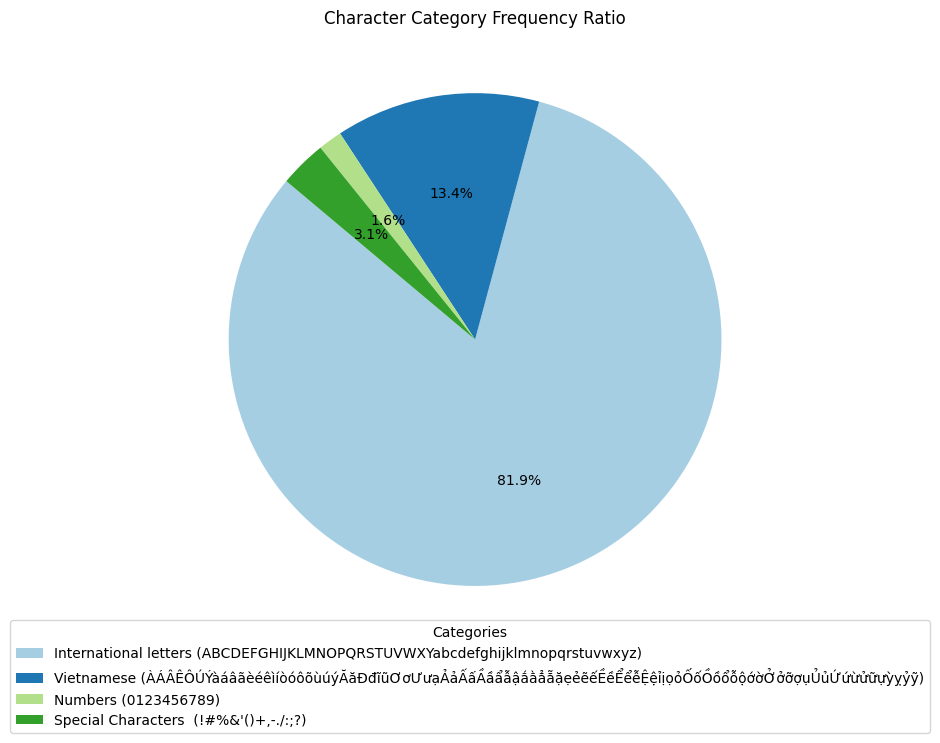

In [42]:
# Create a DataFrame for easy plotting
df_char_categories = pd.DataFrame({'Category': ['International letters (ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvwxyz)',
                                                'Vietnamese (ÀÁÂÊÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủỨứừửữựỳỵỷỹ)',
                                                'Numbers (0123456789)',
                                                'Special Characters  (!#%&\'()+,-./:;?)'],
                                   'Count': [letter_count, vietnamese_count, number_count, special_count]})

# Visualize the frequency ratio with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_char_categories['Count'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Character Category Frequency Ratio')

# Customize legend appearance and position
legend_labels = df_char_categories['Category']
plt.legend(legend_labels, title='Categories', loc='lower right', bbox_to_anchor=(1.25, -0.15), ncol=1)

plt.show()

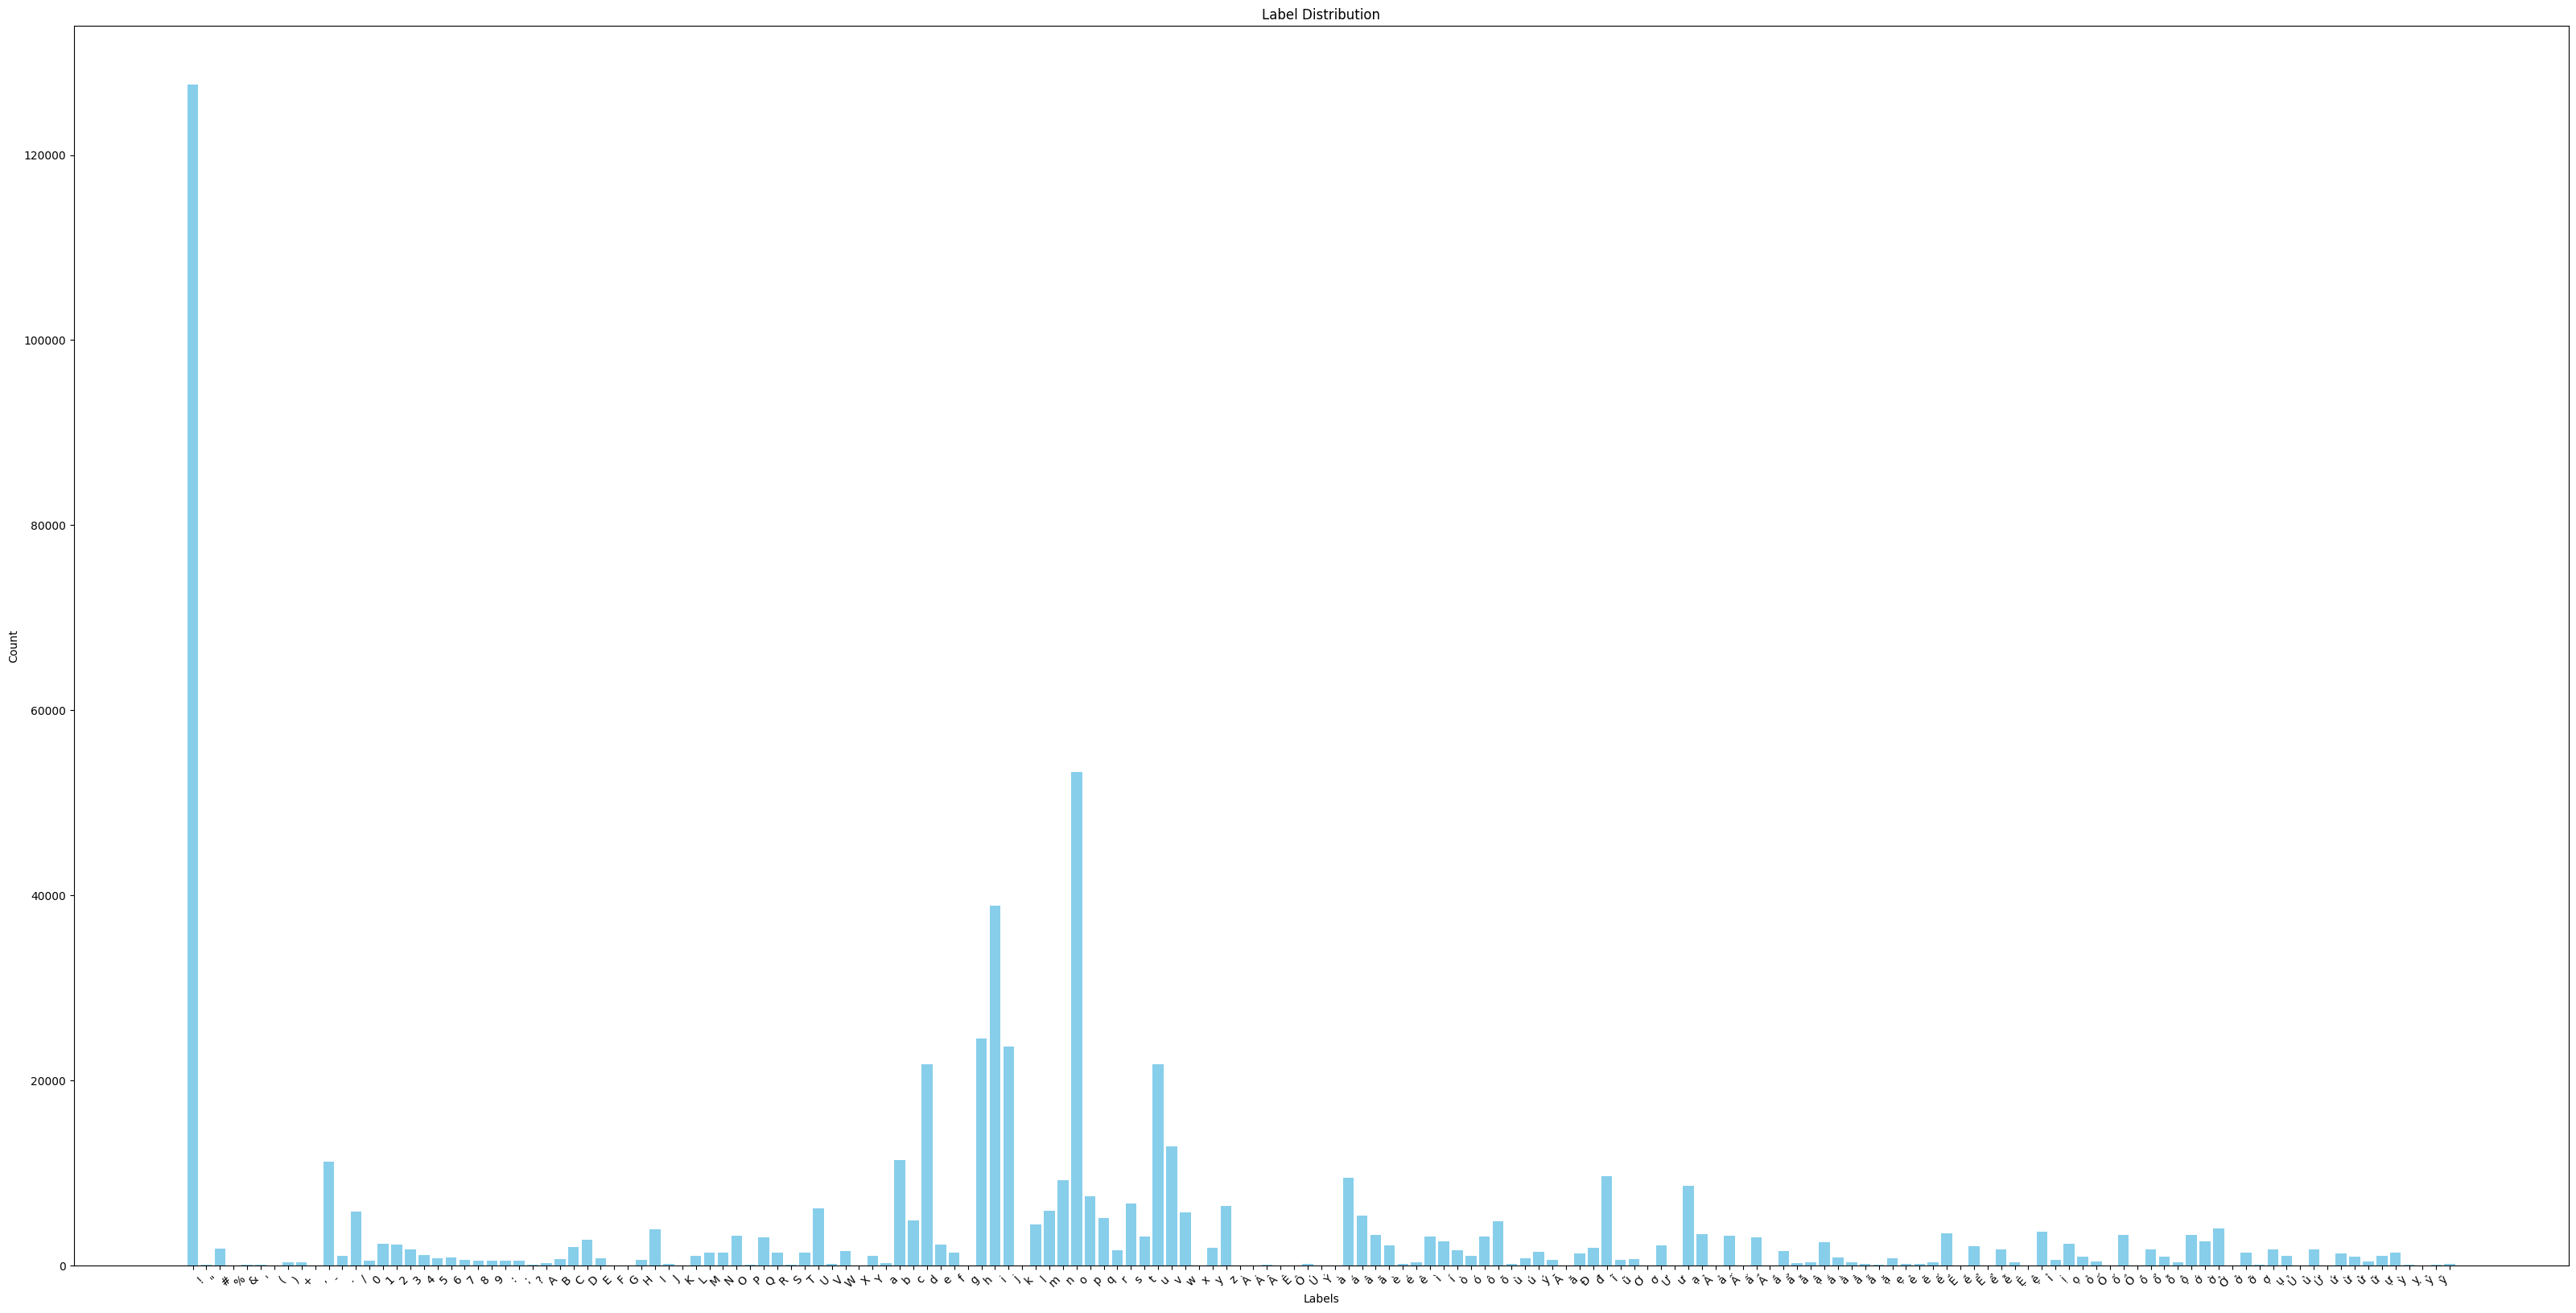

In [8]:
# Count occurrences of each label
label_counts = {char: sum(label.count(char) for label in labels.values()) for char in char_list}

# Visualize label distribution with a bar chart
plt.figure(figsize=(40,20))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

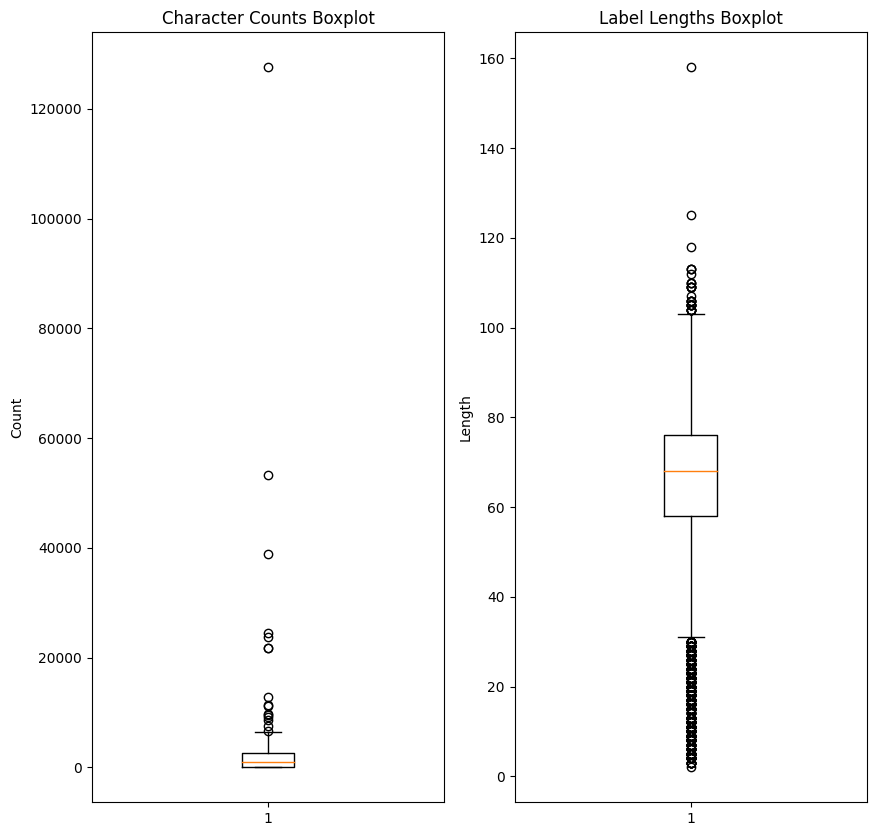

In [9]:

char_list = sorted(set(char for label in labels.values() for char in label))
label_lengths = [len(label) for label in labels.values()]

# Convert to a DataFrame for easy plotting
df_char_counts = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count'])
df_label_lengths = pd.DataFrame(label_lengths, columns=['Length'])

# Visualize counts with a boxplot
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.boxplot(df_char_counts['Count'])
plt.title('Character Counts Boxplot')
plt.ylabel('Count')

# Visualize lengths with a boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_label_lengths['Length'])
plt.title('Label Lengths Boxplot')
plt.ylabel('Length')

plt.show()

In [12]:
# Statistical information for counts
print("Character Counts Summary:")
print(df_char_counts['Count'].describe())

Character Counts Summary:
count       167.000000
mean       3568.994012
std       11537.342617
min           1.000000
25%         132.000000
50%         962.000000
75%        2682.000000
max      127578.000000
Name: Count, dtype: float64


In [13]:
# Statistical information for lengths
print("Label Lengths Summary:")
print(df_label_lengths['Length'].describe())

Label Lengths Summary:
count    9120.000000
mean       65.353289
std        17.588283
min         2.000000
25%        58.000000
50%        68.000000
75%        76.000000
max       158.000000
Name: Length, dtype: float64


In [ ]:
# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)

    return dig_lst
encode_to_labels("Life is hard")

[38, 60, 57, 56, 0, 60, 70, 0, 59, 52, 69, 55]

In [ ]:
dataset = "/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data"

# find all image paths for train folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(dataset).glob('**/*'):
    if item.suffix not in [".json"]:
        train_image_path.append(str(item))
train_image_path[:10]

['/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0825_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0821_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0823_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0829_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0827_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0828_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0822_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0831_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0832_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0833_samples.png']

In [ ]:
#Matching full absoluate paths and labels instead of filenames and labels
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(dataset))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = labels[file_name]
      dict_filepath_label[str(item)]=label
dict_filepath_label

{'/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0825_samples.png': "Thôn 3, Xã Nhân Cơ, Huyện Đắk R'Lấp, Đắk Nông",
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0821_samples.png': '951B ấp 1, Xã Đạo Thạnh, Thành Phố Mỹ Tho, Tiền Giang',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0823_samples.png': '1441 khu 34 Song Mai, Thành Phố Bắc Giang, Bắc Giang',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0829_samples.png': 'Số 1/54 Đình Đông, Phường Đông Hải, Quận Lê Chân, Hải Phòng',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0827_samples.png': 'Xóm 1, thôn Đại Mão, Xã Hoài Thượng, Huyện Thuận Thành, Bắc Ninh',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0828_samples.png': 'Số 61A, Thị trấn Yên Mỹ, Huyện Yên Mỹ, Hưng Yên',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0822_samples.png': 'Ô5, Khu B, Thị trấn Hậu Nghĩa, Huyện Đức Hoà, 

In [ ]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [ ]:
all_image_paths = list(dict_filepath_label.keys())
all_image_paths[:10]

['/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0825_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0821_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0823_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0829_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0827_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0828_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0822_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0831_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0832_samples.png',
 '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/data/0833_samples.png']

In [ ]:
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)
# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)